In [8]:
import torch

offset1 = torch.zeros(10, 2)
offset1[:, 0] = 3
offset2 = torch.zeros(10, 2)
offset2[:, 1] = 3
x0 = torch.randn(10, 2)
x1 = torch.randn(10, 2) + offset1
x2 = torch.randn(10, 2) + offset2
x_copy = torch.cat([x0, x1, x2])
zeros = torch.zeros(10)
y = torch.cat([zeros, zeros + 1, zeros + 2]).long()
print(x_copy)
print(y)

tensor([[-0.8875,  0.9318],
        [-0.4579,  1.1031],
        [-0.4244,  0.0995],
        [-1.0011, -2.2733],
        [ 0.6856,  0.8720],
        [ 1.1494,  0.5595],
        [ 0.2897, -0.0532],
        [ 1.0321, -1.3323],
        [-1.0532, -0.2374],
        [ 1.2963, -0.3030],
        [ 2.4112,  0.5733],
        [ 3.7485, -0.1593],
        [ 2.9456,  0.7500],
        [ 2.8178,  2.5478],
        [ 3.9092, -0.5454],
        [ 2.9531, -1.7259],
        [ 3.3195, -1.0389],
        [ 2.4081, -0.7632],
        [ 3.2462,  1.1453],
        [ 2.8889,  0.2258],
        [ 0.1231,  3.1007],
        [ 0.8818,  2.2509],
        [-0.2407,  3.5946],
        [ 0.1685,  1.2205],
        [-0.4198,  2.7655],
        [ 1.2599,  4.6585],
        [ 0.2454,  3.5539],
        [ 0.4865,  3.3598],
        [ 1.2188,  2.8410],
        [ 0.4724,  3.5516]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


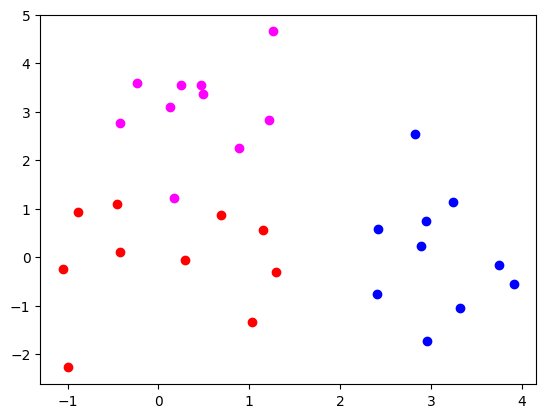

In [9]:
from matplotlib import pyplot as plt
plt.scatter(x0[:, 0], x0[:, 1], c = 'red')
plt.scatter(x1[:, 0], x1[:, 1], c = 'blue')
plt.scatter(x2[:, 0], x2[:, 1], c = 'magenta')
plt.show()

In [10]:
from torch import nn
from tqdm import trange

f1 = nn.Linear(2, 3)
w1_fixed = torch.randn(3, 2)
b1_fixed = torch.randn(3, 1)
f1.weight = torch.nn.Parameter(w1_fixed.clone())
ce = nn.CrossEntropyLoss()
optim = torch.optim.Adam(f1.parameters())

for _ in trange(1):
    y_hat = f1(x_copy[:1])
    loss = ce(y_hat, y[:1])
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(f1.weight.grad)
    print(f1.bias.grad)
print(y_hat)

100%|██████████| 1/1 [00:00<00:00, 202.26it/s]

tensor([[ 0.8108, -0.8513],
        [-0.6587,  0.6916],
        [-0.1521,  0.1597]])
tensor([-0.9135,  0.7422,  0.1714])
tensor([[-1.0798,  1.0701, -0.3957]], grad_fn=<AddmmBackward0>)


In [11]:
from torch import nn
from tqdm import trange

w1 = w1_fixed.clone()
b1 = b1_fixed.clone()
y_onehot = torch.zeros(y.size(0), 3)
y_onehot[torch.arange(y.size(0)), y] = 1

for _ in range(1):
    x = x_copy[:1].t()
    y_hat = w1.matmul(x) + b1
    softmax_y = torch.softmax(y_hat, dim = 0)
    dLdy = (softmax_y - y_onehot[:1].t()).t()
    dydw1 = torch.cat([x, torch.zeros([6, 1]), x, torch.zeros([6, 1]), x]).reshape(3, 6)
    dydb1 = torch.eye(3)
    dLdw1 = dLdy.matmul(dydw1).reshape(3, 2)
    dLdb1 = dLdy.matmul(dydb1)
    print(dLdw1)
    print(dLdb1)

tensor([[ 0.8589, -0.9017],
        [-0.7458,  0.7830],
        [-0.1131,  0.1187]])
tensor([[-0.9677,  0.8403,  0.1274]])
